In [1]:
from alphavantage import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set_style("darkgrid")

In [2]:
data = get_pandas_data(get_daily('MSFT'))

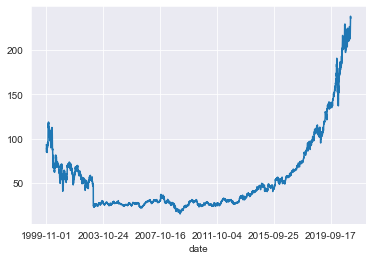

In [3]:
data['open'].plot()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data.head()

,open,high,low,close,volume
date,,,,,
1999-11-01,93.25,94.19,92.12,92.37,26630600
1999-11-02,92.75,94.50,91.94,92.56,23174500
1999-11-03,92.94,93.50,91.50,92.00,22258500
1999-11-04,92.31,92.75,90.31,91.75,27119700
1999-11-05,91.81,92.87,90.50,91.56,35083700


In [6]:
close = data.close

In [7]:
split_size = int(len(data) * 0.8)
train = close[:split_size].values
test = close[split_size:].values

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
train = train.reshape(-1,1)
test = test.reshape(-1,1)

In [12]:
train

array([[0.7222799 ],
       [0.72425249],
       [0.71843854],
       ...,
       [0.99943535],
       [0.97910785],
       [0.94918125]])

In [11]:
smoothing_window_size = 1000
for di in range(0, len(train), smoothing_window_size):
    scaler.fit(train[di:di+smoothing_window_size,:])
    train[di:di+smoothing_window_size,:] = scaler.transform(train[di:di+smoothing_window_size,:])



In [13]:
train = train.reshape(-1)

test = scaler.transform(test).reshape(-1)

In [15]:
ema = 0.0
gamma = 0.1
for ti in range(len(train)):
    ema = gamma*train[ti] + (1-gamma)*ema
    train[ti] = ema

# Used for visualization and test purposes
all_data = np.concatenate([train, test],axis=0)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
scoring = "r2"



In [38]:


# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.show()

AttributeError: module 'datetime' has no attribute 'strtime'